# Validation: Mobility data sensitivity

This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* Tests the effect of mobility data on cm effectiveness

In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import arviz as az
import copy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor
import sensitivityplotlib as spl


%matplotlib inline

In [143]:
dp = DataPreprocessor(drop_HS=True)
data_mob_no_work = dp.preprocess_data("../final_data/data_mob_no_work.csv")
data_mob = dp.preprocess_data("../final_data/data_mob.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc

## build and run model
skip this if you already have traces 

In [79]:
model_types = ['combined', 'active', 'death', 'combined_v3']
data_mobility_types = ['no_work', 'rec_work']

In [82]:
for data_mobility_type in data_mobility_types:
    if data_mobility_type=='no_work':
        data = copy.deepcopy(data_mob_no_work)
    if data_mobility_type=='rec_work':
        data = copy.deepcopy(data_mob)
    for model_type in model_types:
        print('Model: ' + str(model_type))
        print('Data Mobility Type: ' + str(data_mobility_type))
        if model_type=='combined':
            with cm_effect.models.CMCombined_Final(data) as model:
                model.build_model()  
        if model_type=='active':
            with cm_effect.models.CMActive_Final(data) as model:
                model.build_model()  
        if model_type=='death':
            with cm_effect.models.CMDeath_Final(data) as model:
                model.build_model()      
        if model_type=='combined_v3':
            with cm_effect.models.CMCombined_Final_V3(data) as model:
                model.build_model()  

        model.run(1000, chains=8, cores=8)
        filename = 'out_final/data_mobility_' + data_mobility_type + '_' + model_type + '.txt'
        cm_trace = model.trace["CMReduction"]
        np.savetxt(filename, cm_trace)

['Mask Wearing', 'Symptomatic Testing', 'Gatherings <1000', 'Gatherings <100', 'Gatherings <10', 'Some Businesses Suspended', 'Most Businesses Suspended', 'School Closure', 'Stay Home Order', 'Mobility - retail and rec']
Model: combined
Data Mobility Type: no_work
Model: active
Data Mobility Type: no_work
Model: death
Data Mobility Type: no_work
['Mask Wearing', 'Symptomatic Testing', 'Gatherings <1000', 'Gatherings <100', 'Gatherings <10', 'Some Businesses Suspended', 'Most Businesses Suspended', 'School Closure', 'Stay Home Order', 'Mobility - retail and rec', 'Mobility - workplace']
Model: combined
Data Mobility Type: rec_work
Model: active
Data Mobility Type: rec_work
Model: death
Data Mobility Type: rec_work


### Plot traces 

In [ ]:
plt.figure()
model.plot_traces()

### Plot countermeasure effectiveness

In [144]:
legend_labels = ['Default', 'Mobility Data Added']
legend_fontsize=6
out_dir = 'out_SI_1'
legend_fontsize=5

##### plot combined

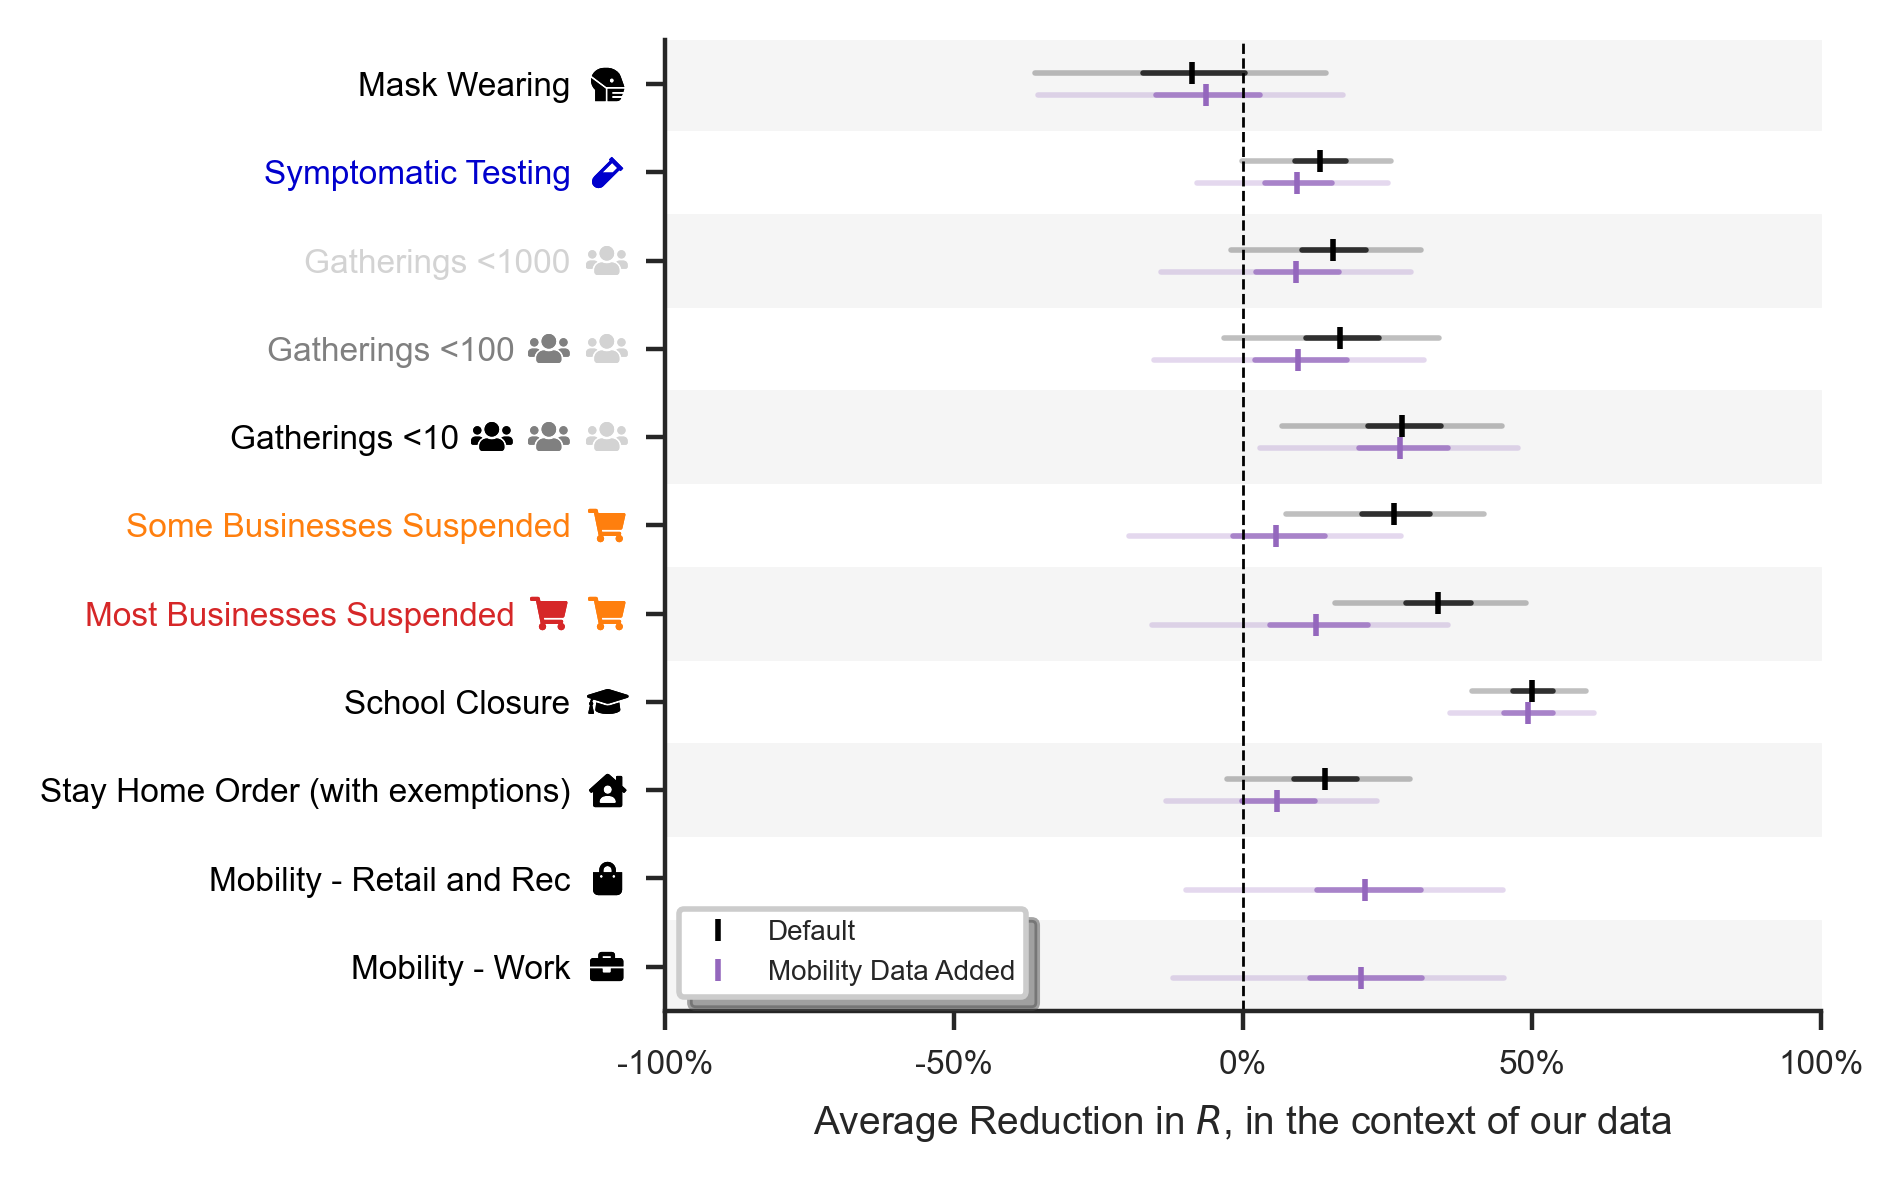

In [146]:
colors= ['black','tab:purple']
import sensitivityplotlib as spl
filenames = [out_dir + '/default_combined.txt', out_dir + '/data_mobility_rec_work_combined.txt']
spl.plot_cm_effect_sensitivity_v2(filenames, data_mob.CMs, legend_labels, 
                               colors=colors, 
                               legend_fontsize=legend_fontsize)
plt.savefig(out_dir + '/data_mobility_sensitivity_combined.pdf')

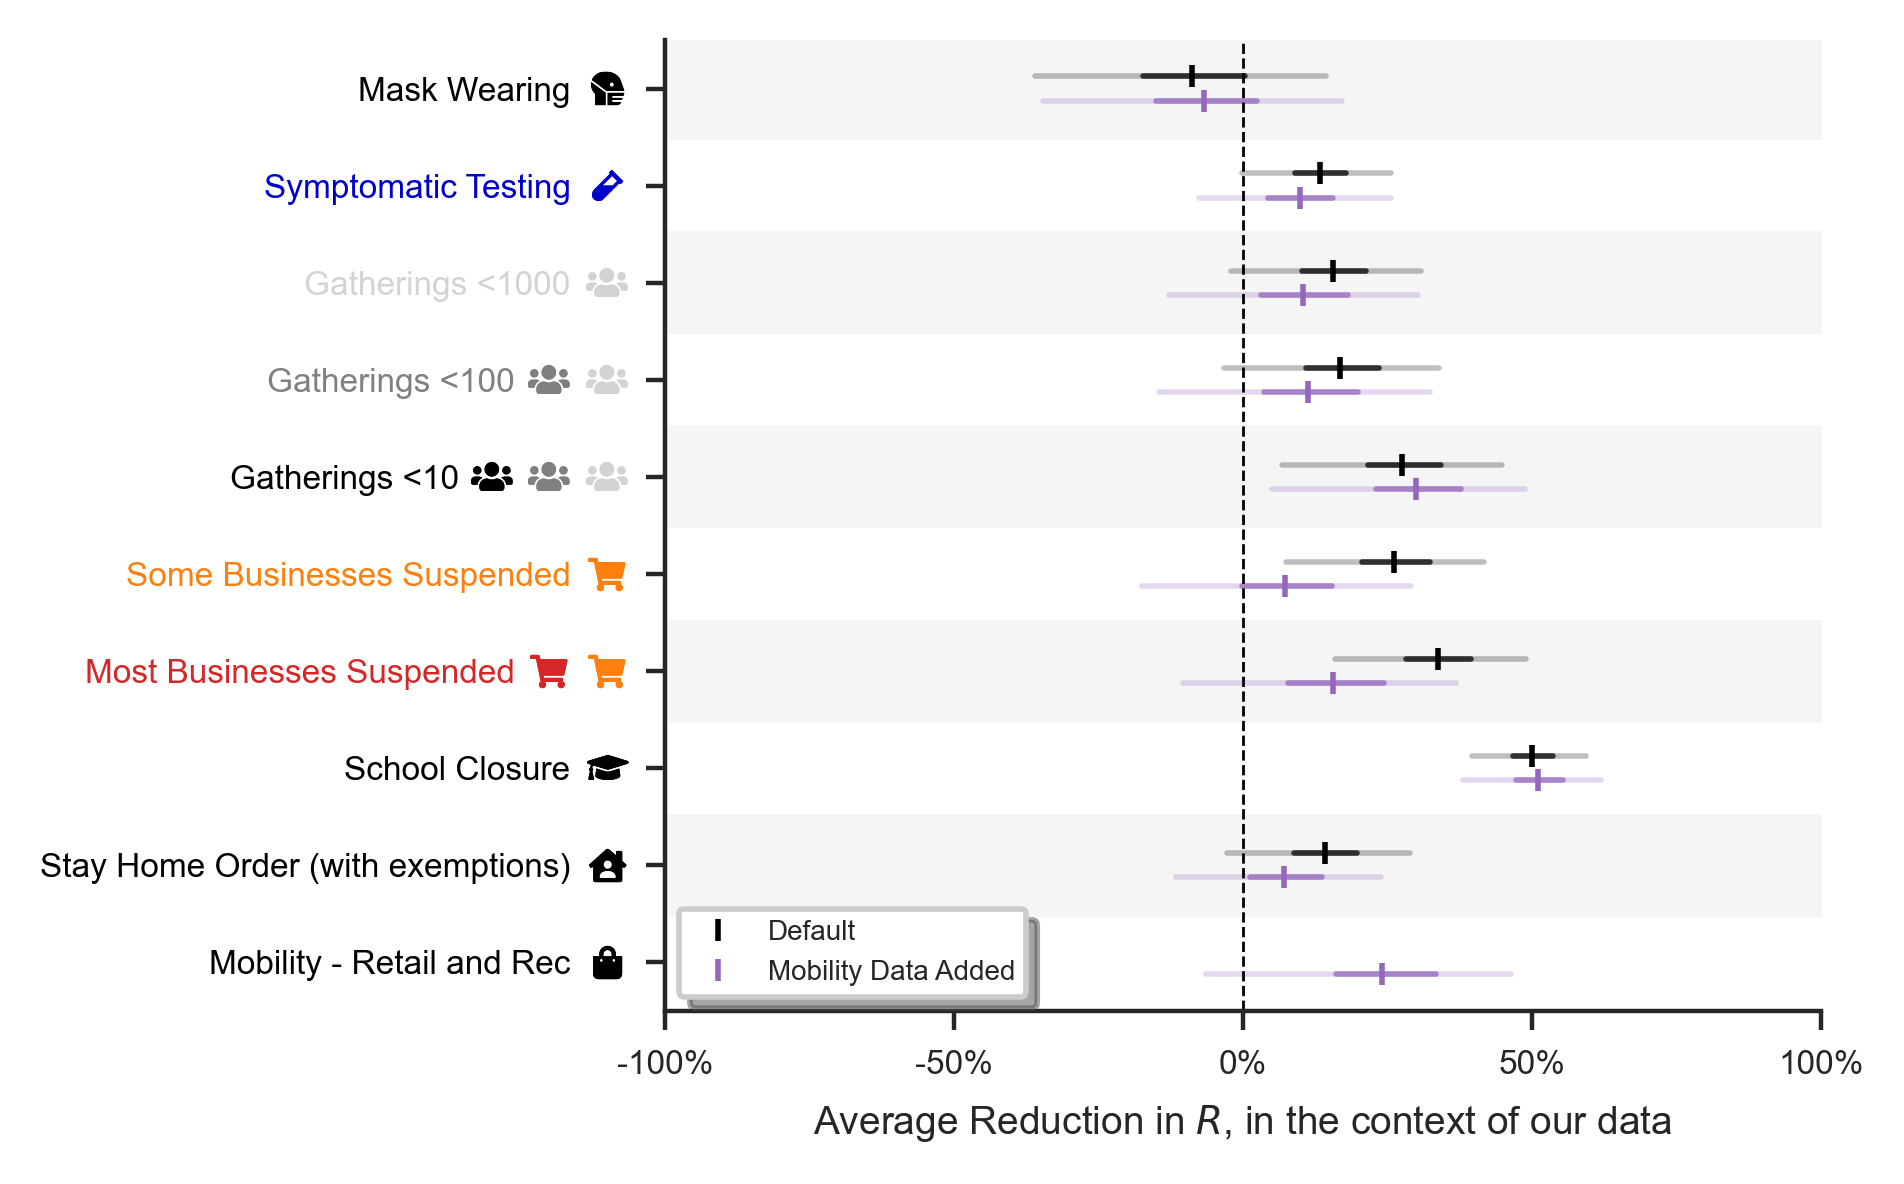

In [135]:
colors= ['black','tab:purple']
filenames = [out_dir + '/default_combined.txt', out_dir + '/data_mobility_no_work_combined.txt']
spl.plot_cm_effect_sensitivity_v2(filenames, data_mob_no_work.CMs, legend_labels, 
                               colors=colors, 
                               legend_fontsize=legend_fontsize)
plt.savefig(out_dir + '/data_mobility_no_work_sensitivity_combined.pdf')

##### plot active

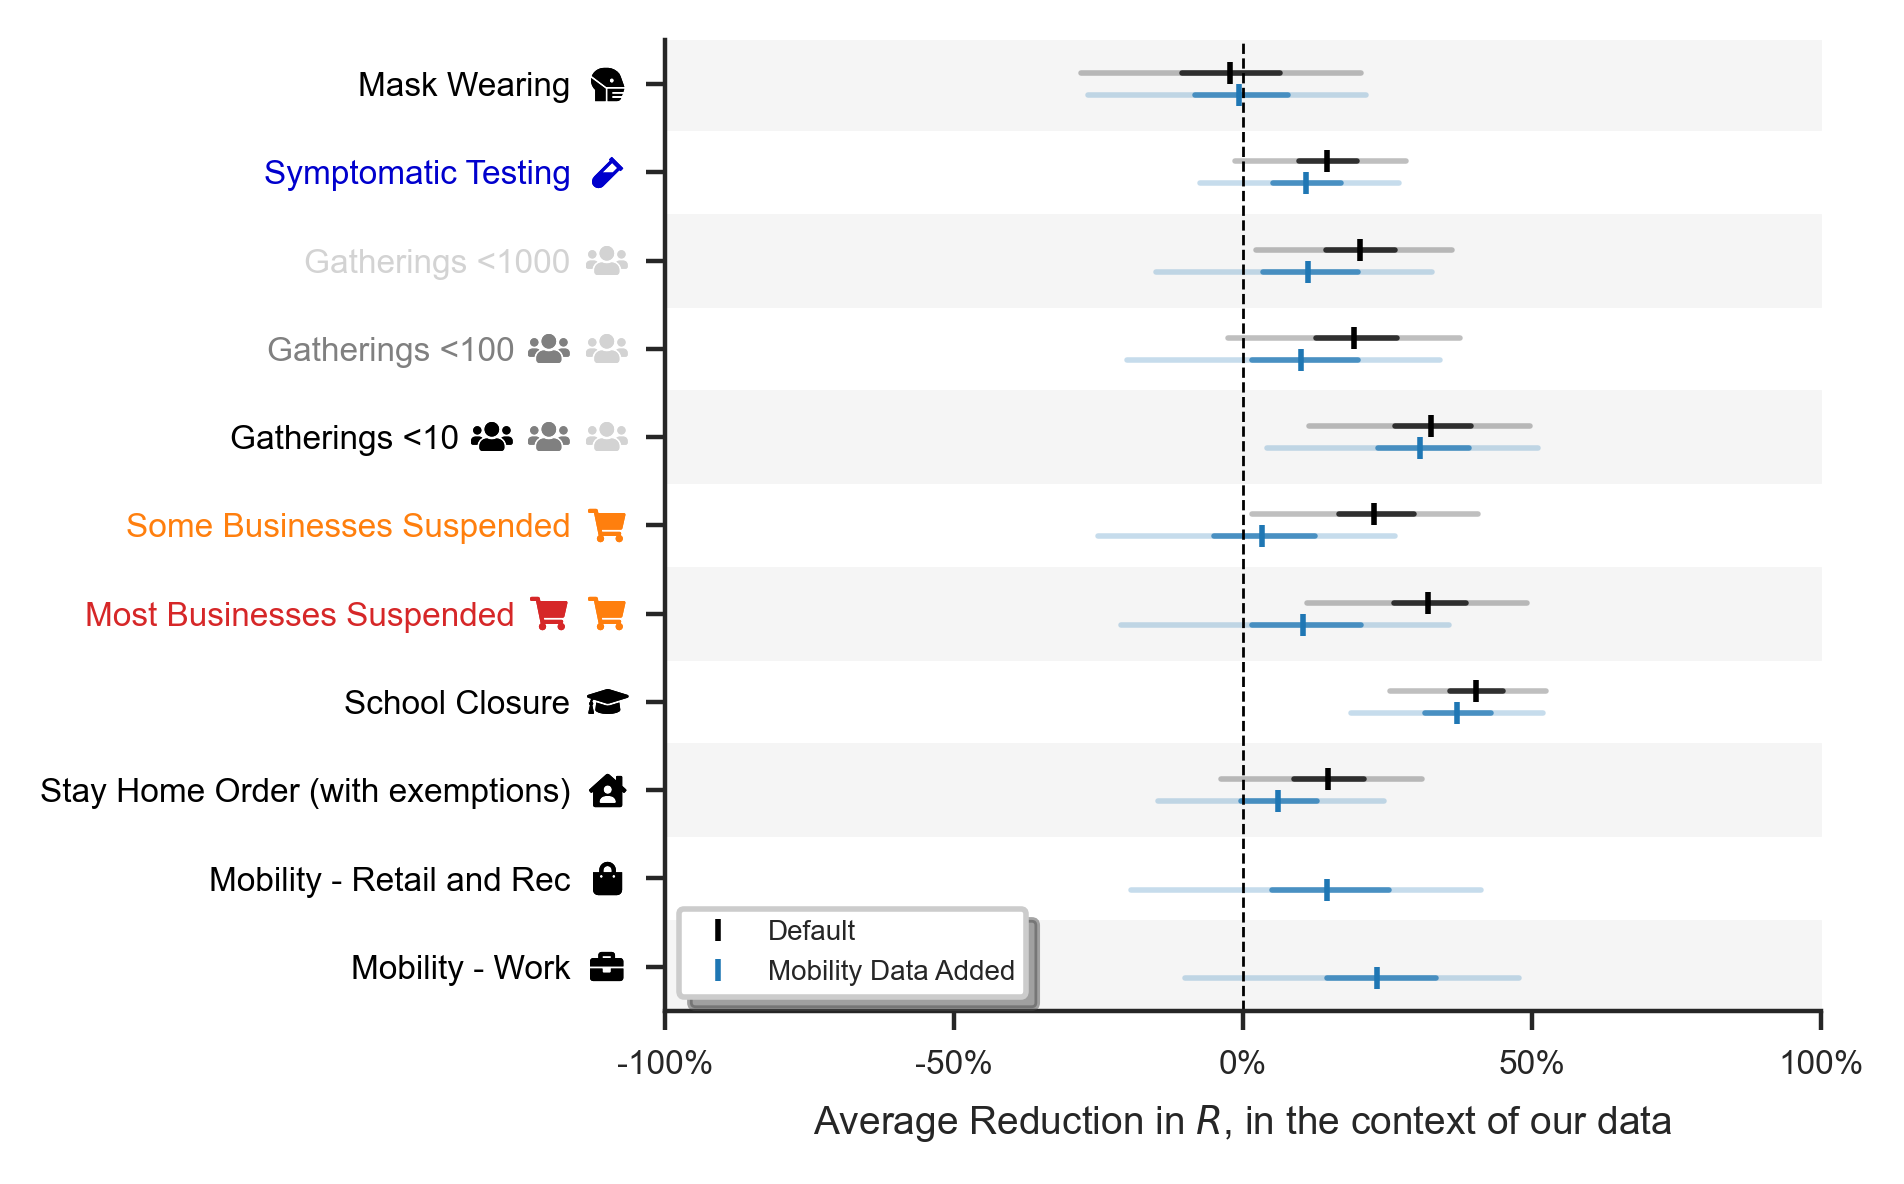

In [136]:
colors= ['black','tab:blue']
filenames = [out_dir + '/default_active.txt', out_dir + '/data_mobility_rec_work_active.txt']
spl.plot_cm_effect_sensitivity_v2(filenames, data_mob.CMs, legend_labels, 
                               colors=colors, 
                               legend_fontsize=legend_fontsize)
plt.savefig(out_dir + '/data_mobility_sensitivity_active.pdf')

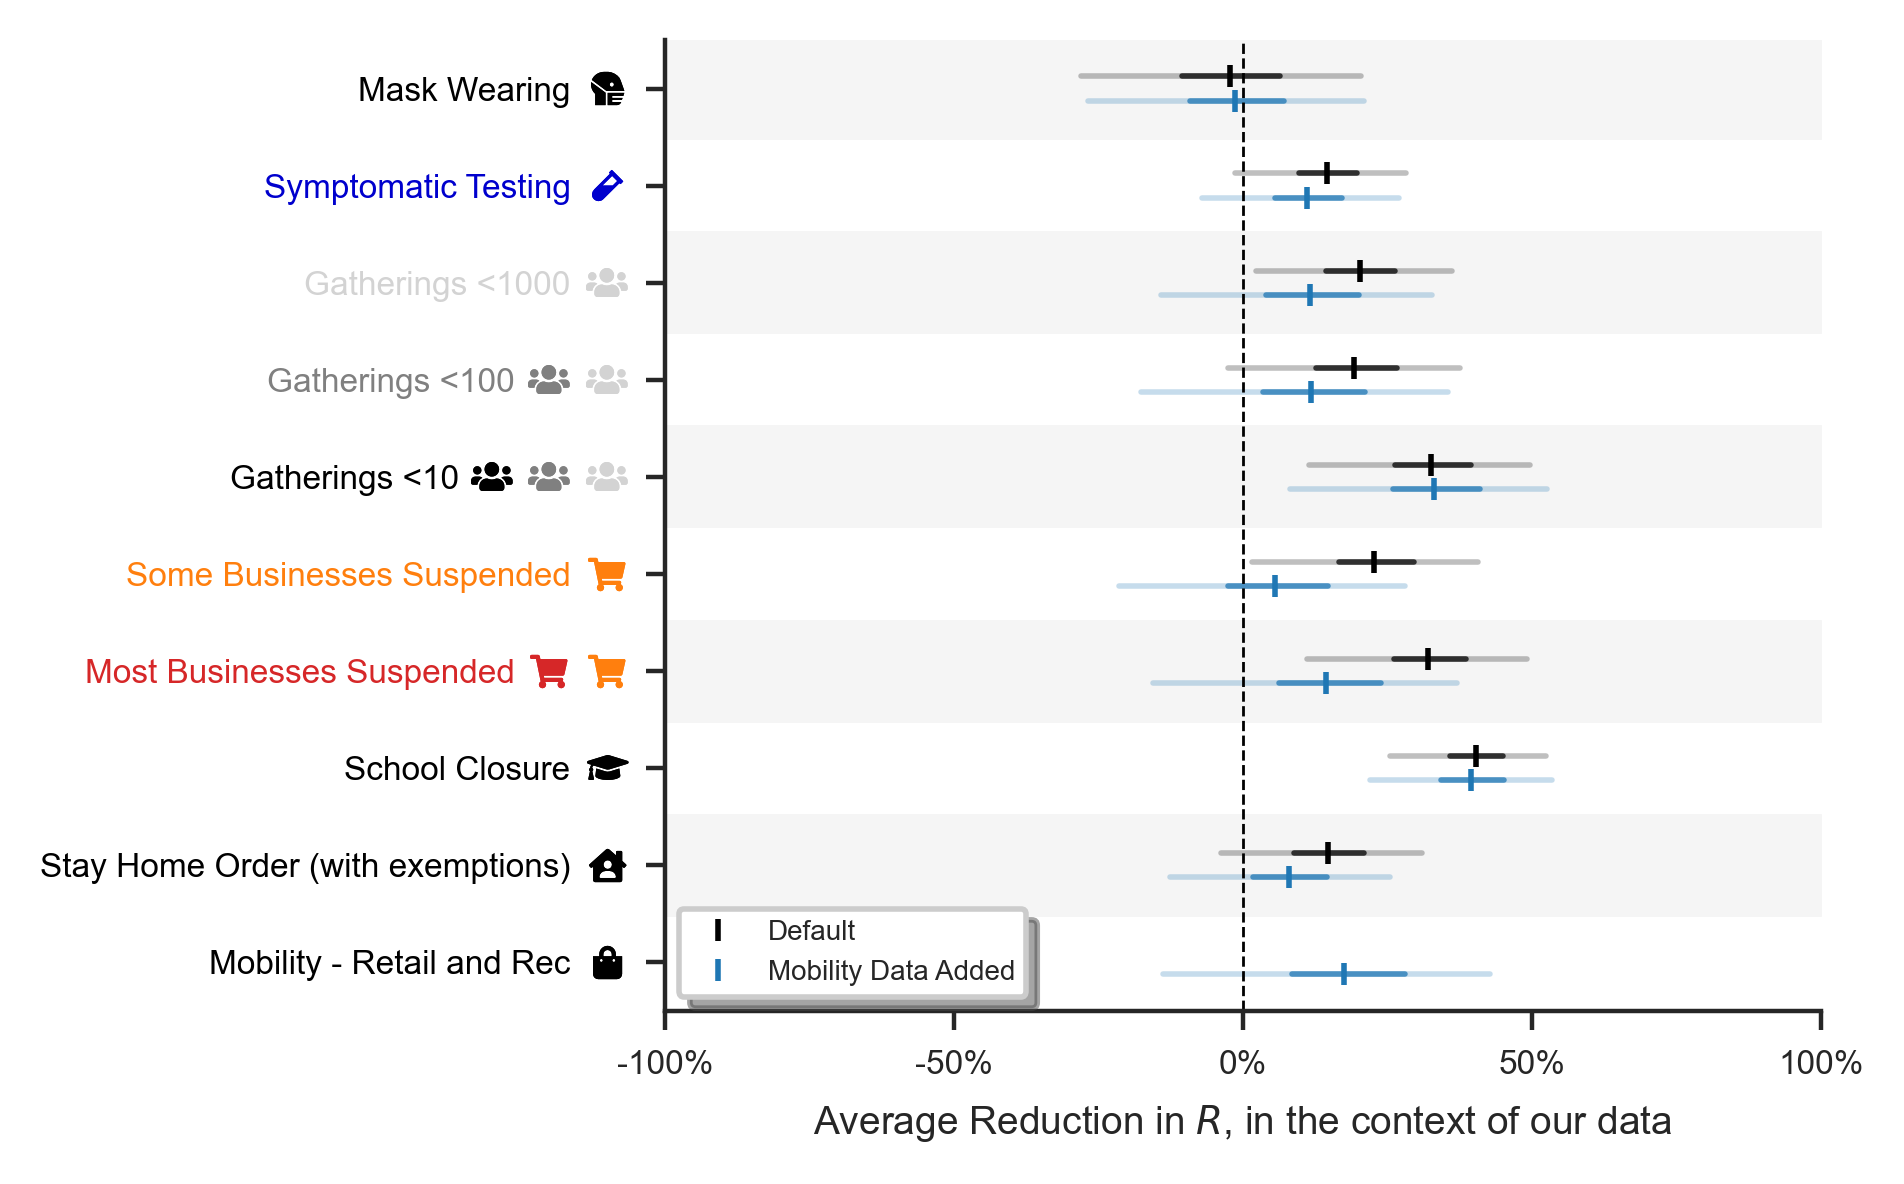

In [137]:
colors= ['black','tab:blue']
filenames = [out_dir + '/default_active.txt', out_dir + '/data_mobility_no_work_active.txt']
spl.plot_cm_effect_sensitivity_v2(filenames, data_mob_no_work.CMs, legend_labels, 
                               colors=colors, 
                               legend_fontsize=legend_fontsize)
plt.savefig(out_dir + '/data_mobility_no_work_sensitivity_active.pdf')

##### plot deaths

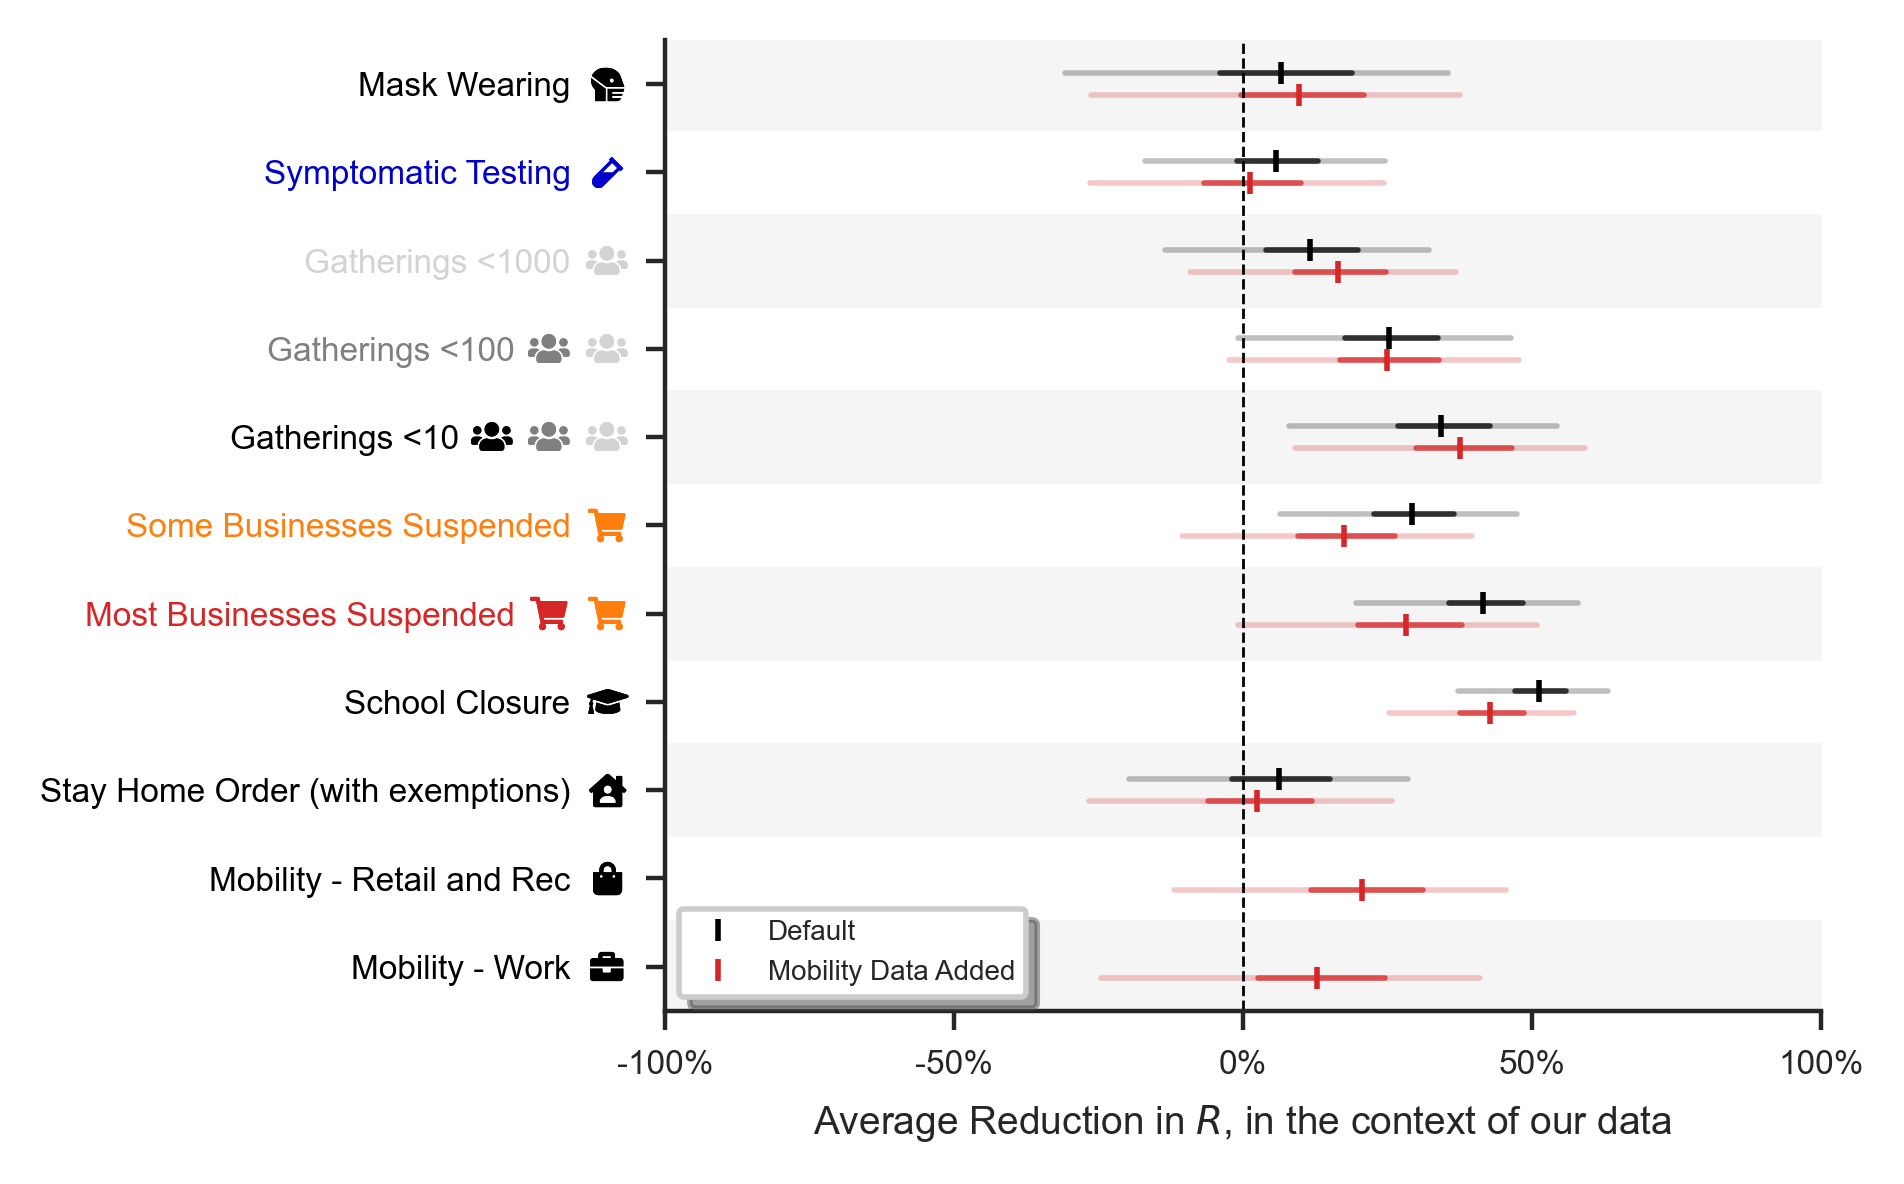

In [138]:
colors= ['black','tab:red']
filenames = [out_dir + '/default_death.txt', out_dir + '/data_mobility_rec_work_death.txt']
spl.plot_cm_effect_sensitivity_v2(filenames, data_mob.CMs, legend_labels, 
                               colors=colors, 
                               legend_fontsize=legend_fontsize)
plt.savefig(out_dir + '/data_mobility_sensitivity_death.pdf')

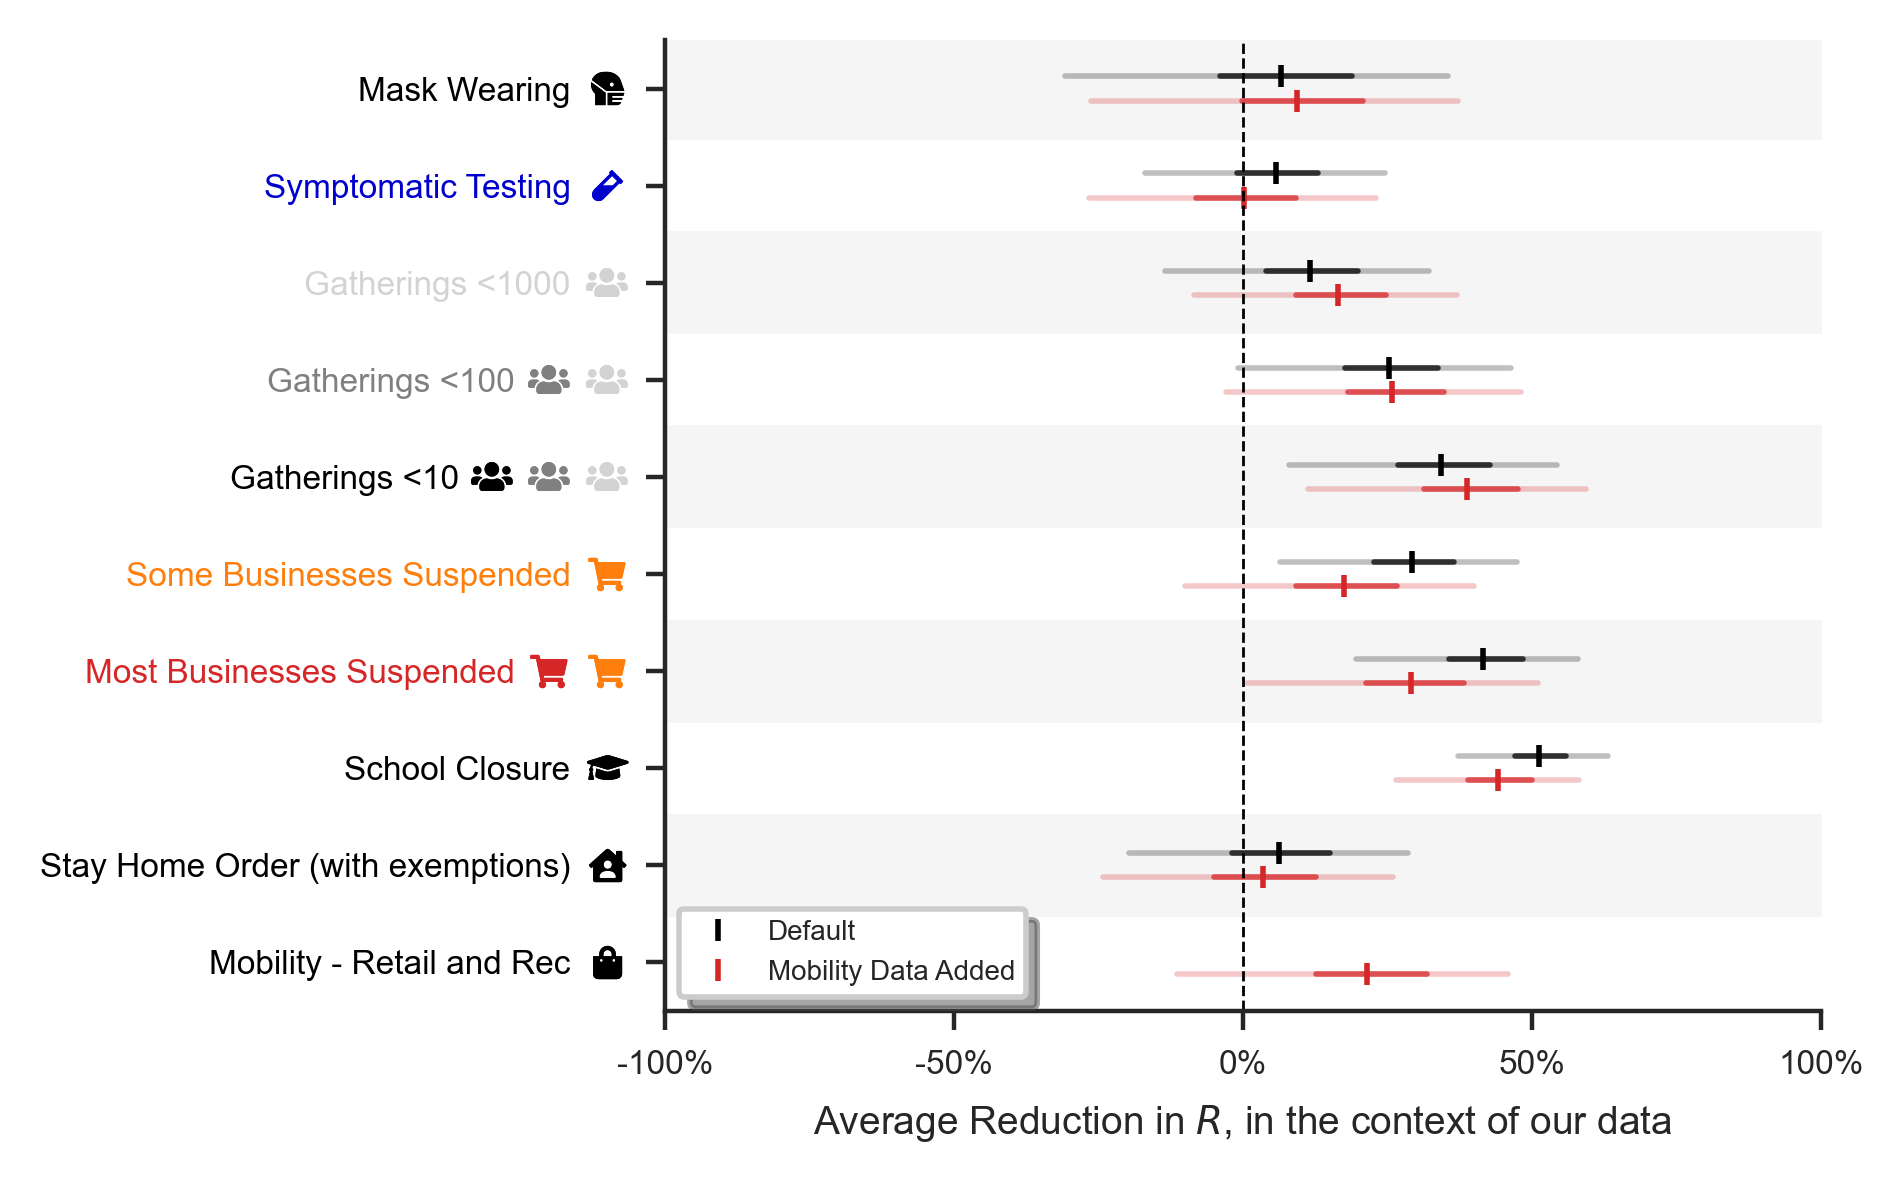

In [139]:
colors= ['black','tab:red']
filenames = [out_dir + '/default_death.txt', out_dir + '/data_mobility_no_work_death.txt']
spl.plot_cm_effect_sensitivity_v2(filenames, data_mob_no_work.CMs, legend_labels, 
                               colors=colors, 
                               legend_fontsize=legend_fontsize)
plt.savefig(out_dir + '/data_mobility_no_work_sensitivity_death.pdf')

'/Users/annie/Code/Repositories/epimodel/notebooks/sensitivity_stability_checks'